In [64]:
import random
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_excel('LQ.xlsx')
data.info()
grp=data.groupby('Area').count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 6 columns):
Area          2198 non-null object
RSSI          2198 non-null int64
SQ            2198 non-null int64
ETX           2198 non-null float64
Distance      2198 non-null float64
Throughput    2198 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 103.1+ KB


In [65]:
#Getting the maximum throughput in order to calculate TPR
maximum=data.groupby(['Area'])['Throughput'].max()
maximum

Area
ParkLOS           17.760023
ParkNLOS          17.929483
RESIDENTIAL_IN    18.342404
RESIDENTIAL_OD    14.281408
TrackLOS          16.268372
TrackNLOS         15.889274
Name: Throughput, dtype: float64

In [67]:
data.head()

,Area,RSSI,SQ,ETX,Distance,Throughput
0,ParkLOS,81,100,1.000000,0.000000,13.663293
1,TrackLOS,79,100,1.111111,15.321800,12.887519
2,ParkNLOS,44,78,1.000000,49.807500,5.449338
3,RESIDENTIAL_IN,72,100,1.000000,0.000000,12.904800
4,ParkLOS,78,100,1.000000,0.185362,13.563479


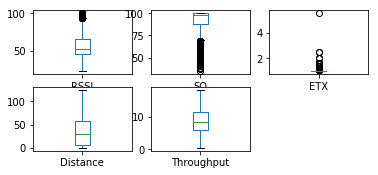

In [4]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BB044BC88>,
      dtype=object)

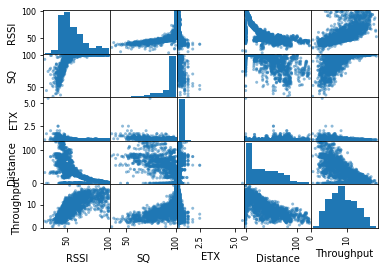

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)

In [68]:
data['TPR']=0
data.loc[data.Area=='ParkLOS', ['TPR']]=data['Throughput']/maximum.ParkLOS
data.loc[data.Area=='ParkNLOS', ['TPR']]=data['Throughput']/maximum.ParkNLOS
data.loc[data.Area=='RESIDENTIAL_OD', ['TPR']]=data['Throughput']/maximum.RESIDENTIAL_OD
data.loc[data.Area=='RESIDENTIAL_IN', ['TPR']]=data['Throughput']/maximum.RESIDENTIAL_IN

data.loc[data.Area=='TrackLOS', ['TPR']]=data['Throughput']/maximum.TrackLOS
data.loc[data.Area=='TrackNLOS', ['TPR']]=data['Throughput']/maximum.TrackNLOS

data.describe()
data.head()

,Area,RSSI,SQ,ETX,Distance,Throughput,TPR
0,ParkLOS,81,100,1.000000,0.000000,13.663293,0.769329
1,TrackLOS,79,100,1.111111,15.321800,12.887519,0.792182
2,ParkNLOS,44,78,1.000000,49.807500,5.449338,0.303932
3,RESIDENTIAL_IN,72,100,1.000000,0.000000,12.904800,0.703550
4,ParkLOS,78,100,1.000000,0.185362,13.563479,0.763708


In [ ]:
data.to_excel('LQdata.xlsx')

In [7]:
data.count()

Area          2198
RSSI          2198
SQ            2198
ETX           2198
Distance      2198
Throughput    2198
TPR           2198
dtype: int64

In [109]:
encoded_data=pd.get_dummies(data)
encoded_data.head()

,RSSI,SQ,ETX,Distance,Throughput,TPR,Area_ParkLOS,Area_ParkNLOS,Area_RESIDENTIAL_IN,Area_RESIDENTIAL_OD,Area_TrackLOS,Area_TrackNLOS
0,81,100,1.000000,0.000000,13.663293,0.769329,1,0,0,0,0,0
1,79,100,1.111111,15.321800,12.887519,0.792182,0,0,0,0,1,0
2,44,78,1.000000,49.807500,5.449338,0.303932,0,1,0,0,0,0
3,72,100,1.000000,0.000000,12.904800,0.703550,0,0,1,0,0,0
4,78,100,1.000000,0.185362,13.563479,0.763708,1,0,0,0,0,0


In [161]:
feature=['RSSI', 'SQ','ETX','Distance','Area_ParkLOS','Area_ParkNLOS','Area_RESIDENTIAL_IN','Area_RESIDENTIAL_OD','Area_TrackLOS','Area_TrackNLOS']
X=encoded_data[feature]
y=encoded_data['TPR']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=100,test_size=0.20)
X_train.shape[1]
y_test.skew()

0.13925588881722453

In [139]:
#Normalization
feature1=['RSSI', 'SQ','ETX','Distance']
mean=X_train[feature1].mean(axis=0)
std=X_train[feature1].std(axis=0)

#Normalization of train dataset
X_train[feature1]=X_train[feature1]-mean
X_train[feature1]=X_train[feature1]/std

#Normalization of test dataset
X_test[feature1]=X_test[feature1]-mean
X_test[feature1]=X_test[feature1]/std

X_test.head()

,RSSI,SQ,ETX,Distance,Area_ParkLOS,Area_ParkNLOS,Area_RESIDENTIAL_IN,Area_RESIDENTIAL_OD,Area_TrackLOS,Area_TrackNLOS
1663,-0.532552,0.107608,-0.282099,1.778417,0,0,0,1,0,0
1699,-0.856909,-2.346020,-0.282099,2.135698,0,0,0,1,0,0
960,-0.208194,0.598333,-0.282099,0.015075,0,0,0,0,1,0
1434,0.505393,0.680121,-0.282099,-0.494283,0,0,0,1,0,0
1634,-0.402809,0.189396,0.404499,1.490608,0,0,0,1,0,0


In [140]:
import numpy as np
#reprocessing the data for AE
feature1=['RSSI', 'SQ','ETX','Distance']
maxi=X_train[feature1].max(axis=0) 

#Scaling of train dataset
X_train[feature1]=X_train[feature1]/maxi

mini=X_train[feature1].min(axis=0)

#NScaling of test dataset
X_test[feature1]=X_test[feature1]/maxi
mini_test=X_test[feature1].min(axis=0)

#Scaleup of  dataset
scale_values=[1, 7, 1, 1]
scalar = pd.Series(scale_values, index=feature1)
X_train[feature1]=X_train[feature1]+scalar
X_test[feature1]=X_test[feature1]+scalar


maxi_1=X_train.max(axis=0)
X_train=X_train/maxi_1
X_test=X_test/maxi_1

X_test.head()

,RSSI,SQ,ETX,Distance,Area_ParkLOS,Area_ParkNLOS,Area_RESIDENTIAL_IN,Area_RESIDENTIAL_OD,Area_TrackLOS,Area_TrackNLOS
1663,0.404076,0.894777,0.494939,0.815268,0.0,0.0,0.0,1.0,0.0,0.0
1699,0.345652,0.443823,0.494939,0.878605,0.0,0.0,0.0,1.0,0.0,0.0
960,0.462500,0.984968,0.494939,0.502672,0.0,0.0,0.0,0.0,1.0,0.0
1434,0.591032,1.000000,0.494939,0.412376,0.0,0.0,0.0,1.0,0.0,0.0
1634,0.427445,0.909809,0.507257,0.764247,0.0,0.0,0.0,1.0,0.0,0.0


In [141]:
import keras
from keras import models
from keras import layers
from keras import backend as K
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
#K.clear_session()
#keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)
model=models.Sequential()
model.add(layers.Dense(5, activation='relu', kernel_initializer='normal',input_shape=(10,)))
model.add(layers.Dense(1,kernel_initializer='normal'))
model.compile(optimizer="adam", metrics=['mae'], loss='mse')
history=model.fit(X_train,y_train,epochs=500, batch_size=25,validation_split=0.2)
model.summary()

Train on 1406 samples, validate on 352 samples
Epoch 1/500
1406/1406 [==============================] - 1s 627us/step - loss: 0.2792 - mean_absolute_error: 0.4853 - val_loss: 0.2025 - val_mean_absolute_error: 0.4008
Epoch 2/500
1406/1406 [==============================] - 0s 46us/step - loss: 0.1528 - mean_absolute_error: 0.3351 - val_loss: 0.0688 - val_mean_absolute_error: 0.2122
Epoch 3/500
1406/1406 [==============================] - 0s 53us/step - loss: 0.0477 - mean_absolute_error: 0.1789 - val_loss: 0.0378 - val_mean_absolute_error: 0.1611
Epoch 4/500
1406/1406 [==============================] - 0s 44us/step - loss: 0.0366 - mean_absolute_error: 0.1613 - val_loss: 0.0358 - val_mean_absolute_error: 0.1561
Epoch 5/500
1406/1406 [==============================] - 0s 51us/step - loss: 0.0347 - mean_absolute_error: 0.1568 - val_loss: 0.0342 - val_mean_absolute_error: 0.1520
Epoch 6/500
1406/1406 [==============================] - 0s 39us/step - loss: 0.0329 - mean_absolute_error: 0.15

1406/1406 [==============================] - 0s 35us/step - loss: 0.0159 - mean_absolute_error: 0.0965 - val_loss: 0.0157 - val_mean_absolute_error: 0.0936
Epoch 49/500
1406/1406 [==============================] - 0s 44us/step - loss: 0.0158 - mean_absolute_error: 0.0961 - val_loss: 0.0160 - val_mean_absolute_error: 0.0941
Epoch 50/500
1406/1406 [==============================] - 0s 41us/step - loss: 0.0158 - mean_absolute_error: 0.0958 - val_loss: 0.0156 - val_mean_absolute_error: 0.0936
Epoch 51/500
1406/1406 [==============================] - 0s 46us/step - loss: 0.0158 - mean_absolute_error: 0.0960 - val_loss: 0.0157 - val_mean_absolute_error: 0.0936
Epoch 52/500
1406/1406 [==============================] - 0s 37us/step - loss: 0.0158 - mean_absolute_error: 0.0961 - val_loss: 0.0160 - val_mean_absolute_error: 0.0940
Epoch 53/500
1406/1406 [==============================] - 0s 46us/step - loss: 0.0159 - mean_absolute_error: 0.0963 - val_loss: 0.0161 - val_mean_absolute_error: 0.0941

1406/1406 [==============================] - 0s 31us/step - loss: 0.0160 - mean_absolute_error: 0.0967 - val_loss: 0.0155 - val_mean_absolute_error: 0.0929
Epoch 97/500
1406/1406 [==============================] - 0s 43us/step - loss: 0.0158 - mean_absolute_error: 0.0963 - val_loss: 0.0155 - val_mean_absolute_error: 0.0931
Epoch 98/500
1406/1406 [==============================] - 0s 46us/step - loss: 0.0157 - mean_absolute_error: 0.0954 - val_loss: 0.0153 - val_mean_absolute_error: 0.0932
Epoch 99/500
1406/1406 [==============================] - 0s 43us/step - loss: 0.0159 - mean_absolute_error: 0.0966 - val_loss: 0.0159 - val_mean_absolute_error: 0.0934
Epoch 100/500
1406/1406 [==============================] - 0s 45us/step - loss: 0.0158 - mean_absolute_error: 0.0958 - val_loss: 0.0157 - val_mean_absolute_error: 0.0930
Epoch 101/500
1406/1406 [==============================] - 0s 47us/step - loss: 0.0158 - mean_absolute_error: 0.0960 - val_loss: 0.0154 - val_mean_absolute_error: 0.09

1406/1406 [==============================] - 0s 34us/step - loss: 0.0157 - mean_absolute_error: 0.0957 - val_loss: 0.0157 - val_mean_absolute_error: 0.0932
Epoch 145/500
1406/1406 [==============================] - 0s 54us/step - loss: 0.0157 - mean_absolute_error: 0.0956 - val_loss: 0.0163 - val_mean_absolute_error: 0.0942
Epoch 146/500
1406/1406 [==============================] - 0s 48us/step - loss: 0.0157 - mean_absolute_error: 0.0955 - val_loss: 0.0158 - val_mean_absolute_error: 0.0932
Epoch 147/500
1406/1406 [==============================] - 0s 52us/step - loss: 0.0159 - mean_absolute_error: 0.0965 - val_loss: 0.0163 - val_mean_absolute_error: 0.0944
Epoch 148/500
1406/1406 [==============================] - 0s 59us/step - loss: 0.0157 - mean_absolute_error: 0.0957 - val_loss: 0.0158 - val_mean_absolute_error: 0.0934
Epoch 149/500
1406/1406 [==============================] - 0s 57us/step - loss: 0.0156 - mean_absolute_error: 0.0956 - val_loss: 0.0156 - val_mean_absolute_error: 0

Epoch 192/500
1406/1406 [==============================] - 0s 45us/step - loss: 0.0155 - mean_absolute_error: 0.0951 - val_loss: 0.0154 - val_mean_absolute_error: 0.0929
Epoch 193/500
1406/1406 [==============================] - 0s 41us/step - loss: 0.0155 - mean_absolute_error: 0.0952 - val_loss: 0.0155 - val_mean_absolute_error: 0.0930
Epoch 194/500
1406/1406 [==============================] - 0s 39us/step - loss: 0.0156 - mean_absolute_error: 0.0955 - val_loss: 0.0154 - val_mean_absolute_error: 0.0930
Epoch 195/500
1406/1406 [==============================] - 0s 43us/step - loss: 0.0156 - mean_absolute_error: 0.0956 - val_loss: 0.0157 - val_mean_absolute_error: 0.0932
Epoch 196/500
1406/1406 [==============================] - 0s 38us/step - loss: 0.0156 - mean_absolute_error: 0.0954 - val_loss: 0.0153 - val_mean_absolute_error: 0.0930
Epoch 197/500
1406/1406 [==============================] - 0s 42us/step - loss: 0.0155 - mean_absolute_error: 0.0950 - val_loss: 0.0152 - val_mean_abs

1406/1406 [==============================] - 0s 44us/step - loss: 0.0157 - mean_absolute_error: 0.0959 - val_loss: 0.0153 - val_mean_absolute_error: 0.0934
Epoch 241/500
1406/1406 [==============================] - 0s 44us/step - loss: 0.0156 - mean_absolute_error: 0.0961 - val_loss: 0.0157 - val_mean_absolute_error: 0.0931
Epoch 242/500
1406/1406 [==============================] - 0s 43us/step - loss: 0.0155 - mean_absolute_error: 0.0951 - val_loss: 0.0155 - val_mean_absolute_error: 0.0930
Epoch 243/500
1406/1406 [==============================] - 0s 31us/step - loss: 0.0156 - mean_absolute_error: 0.0959 - val_loss: 0.0163 - val_mean_absolute_error: 0.0944
Epoch 244/500
1406/1406 [==============================] - 0s 40us/step - loss: 0.0155 - mean_absolute_error: 0.0948 - val_loss: 0.0155 - val_mean_absolute_error: 0.0929
Epoch 245/500
1406/1406 [==============================] - 0s 40us/step - loss: 0.0155 - mean_absolute_error: 0.0951 - val_loss: 0.0154 - val_mean_absolute_error: 0

1406/1406 [==============================] - 0s 46us/step - loss: 0.0154 - mean_absolute_error: 0.0951 - val_loss: 0.0156 - val_mean_absolute_error: 0.0930
Epoch 289/500
1406/1406 [==============================] - 0s 39us/step - loss: 0.0155 - mean_absolute_error: 0.0948 - val_loss: 0.0155 - val_mean_absolute_error: 0.0929
Epoch 290/500
1406/1406 [==============================] - 0s 35us/step - loss: 0.0156 - mean_absolute_error: 0.0955 - val_loss: 0.0152 - val_mean_absolute_error: 0.0927
Epoch 291/500
1406/1406 [==============================] - 0s 46us/step - loss: 0.0154 - mean_absolute_error: 0.0950 - val_loss: 0.0152 - val_mean_absolute_error: 0.0929
Epoch 292/500
1406/1406 [==============================] - 0s 40us/step - loss: 0.0155 - mean_absolute_error: 0.0954 - val_loss: 0.0154 - val_mean_absolute_error: 0.0928
Epoch 293/500
1406/1406 [==============================] - 0s 35us/step - loss: 0.0154 - mean_absolute_error: 0.0952 - val_loss: 0.0161 - val_mean_absolute_error: 0

Epoch 336/500
1406/1406 [==============================] - 0s 38us/step - loss: 0.0154 - mean_absolute_error: 0.0954 - val_loss: 0.0154 - val_mean_absolute_error: 0.0929
Epoch 337/500
1406/1406 [==============================] - 0s 43us/step - loss: 0.0154 - mean_absolute_error: 0.0951 - val_loss: 0.0154 - val_mean_absolute_error: 0.0928
Epoch 338/500
1406/1406 [==============================] - 0s 40us/step - loss: 0.0154 - mean_absolute_error: 0.0950 - val_loss: 0.0156 - val_mean_absolute_error: 0.0929
Epoch 339/500
1406/1406 [==============================] - 0s 44us/step - loss: 0.0154 - mean_absolute_error: 0.0952 - val_loss: 0.0156 - val_mean_absolute_error: 0.0929
Epoch 340/500
1406/1406 [==============================] - 0s 32us/step - loss: 0.0154 - mean_absolute_error: 0.0946 - val_loss: 0.0152 - val_mean_absolute_error: 0.0927
Epoch 341/500
1406/1406 [==============================] - 0s 44us/step - loss: 0.0153 - mean_absolute_error: 0.0949 - val_loss: 0.0151 - val_mean_abs

1406/1406 [==============================] - 0s 42us/step - loss: 0.0154 - mean_absolute_error: 0.0951 - val_loss: 0.0153 - val_mean_absolute_error: 0.0927
Epoch 385/500
1406/1406 [==============================] - 0s 49us/step - loss: 0.0154 - mean_absolute_error: 0.0950 - val_loss: 0.0153 - val_mean_absolute_error: 0.0928
Epoch 386/500
1406/1406 [==============================] - 0s 32us/step - loss: 0.0154 - mean_absolute_error: 0.0951 - val_loss: 0.0153 - val_mean_absolute_error: 0.0927
Epoch 387/500
1406/1406 [==============================] - 0s 50us/step - loss: 0.0154 - mean_absolute_error: 0.0952 - val_loss: 0.0155 - val_mean_absolute_error: 0.0929
Epoch 388/500
1406/1406 [==============================] - 0s 33us/step - loss: 0.0154 - mean_absolute_error: 0.0946 - val_loss: 0.0153 - val_mean_absolute_error: 0.0927
Epoch 389/500
1406/1406 [==============================] - 0s 37us/step - loss: 0.0154 - mean_absolute_error: 0.0952 - val_loss: 0.0154 - val_mean_absolute_error: 0

1406/1406 [==============================] - 0s 44us/step - loss: 0.0154 - mean_absolute_error: 0.0949 - val_loss: 0.0154 - val_mean_absolute_error: 0.0928
Epoch 433/500
1406/1406 [==============================] - 0s 42us/step - loss: 0.0153 - mean_absolute_error: 0.0948 - val_loss: 0.0163 - val_mean_absolute_error: 0.0945
Epoch 434/500
1406/1406 [==============================] - 0s 44us/step - loss: 0.0155 - mean_absolute_error: 0.0949 - val_loss: 0.0152 - val_mean_absolute_error: 0.0927
Epoch 435/500
1406/1406 [==============================] - 0s 41us/step - loss: 0.0154 - mean_absolute_error: 0.0956 - val_loss: 0.0166 - val_mean_absolute_error: 0.0951
Epoch 436/500
1406/1406 [==============================] - 0s 33us/step - loss: 0.0155 - mean_absolute_error: 0.0951 - val_loss: 0.0155 - val_mean_absolute_error: 0.0929
Epoch 437/500
1406/1406 [==============================] - 0s 45us/step - loss: 0.0154 - mean_absolute_error: 0.0949 - val_loss: 0.0152 - val_mean_absolute_error: 0

1406/1406 [==============================] - 0s 43us/step - loss: 0.0154 - mean_absolute_error: 0.0954 - val_loss: 0.0163 - val_mean_absolute_error: 0.0944
Epoch 481/500
1406/1406 [==============================] - 0s 46us/step - loss: 0.0153 - mean_absolute_error: 0.0950 - val_loss: 0.0159 - val_mean_absolute_error: 0.0935
Epoch 482/500
1406/1406 [==============================] - 0s 58us/step - loss: 0.0153 - mean_absolute_error: 0.0946 - val_loss: 0.0152 - val_mean_absolute_error: 0.0925
Epoch 483/500
1406/1406 [==============================] - 0s 47us/step - loss: 0.0153 - mean_absolute_error: 0.0945 - val_loss: 0.0152 - val_mean_absolute_error: 0.0926
Epoch 484/500
1406/1406 [==============================] - 0s 41us/step - loss: 0.0154 - mean_absolute_error: 0.0949 - val_loss: 0.0150 - val_mean_absolute_error: 0.0933
Epoch 485/500
1406/1406 [==============================] - 0s 54us/step - loss: 0.0153 - mean_absolute_error: 0.0950 - val_loss: 0.0153 - val_mean_absolute_error: 0

## Two Hidden Layer Model 

In [142]:
import keras
from keras import models
from keras import layers
from keras import backend as K
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
#K.clear_session()
#keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)
model=models.Sequential()
model.add(layers.Dense(5, activation='relu', kernel_initializer='normal',input_shape=(10,)))
model.add(layers.Dense(2, activation='relu', kernel_initializer='normal'))
model.add(layers.Dense(1,kernel_initializer='normal'))
model.compile(optimizer="adam", metrics=['mae'], loss='mse')
history=model.fit(X_train,y_train,epochs=200, batch_size=15,validation_split=0.2)
model.summary()
from keras.utils import plot_model
plot_model(model,show_shapes=True, to_file='model.png')

Train on 1406 samples, validate on 352 samples
Epoch 1/200
1406/1406 [==============================] - 1s 714us/step - loss: 0.2481 - mean_absolute_error: 0.4506 - val_loss: 0.1249 - val_mean_absolute_error: 0.2973
Epoch 2/200
1406/1406 [==============================] - 0s 77us/step - loss: 0.0590 - mean_absolute_error: 0.1943 - val_loss: 0.0375 - val_mean_absolute_error: 0.1602
Epoch 3/200
1406/1406 [==============================] - 0s 63us/step - loss: 0.0343 - mean_absolute_error: 0.1557 - val_loss: 0.0317 - val_mean_absolute_error: 0.1455
Epoch 4/200
1406/1406 [==============================] - 0s 82us/step - loss: 0.0286 - mean_absolute_error: 0.1413 - val_loss: 0.0260 - val_mean_absolute_error: 0.1302
Epoch 5/200
1406/1406 [==============================] - 0s 68us/step - loss: 0.0234 - mean_absolute_error: 0.1258 - val_loss: 0.0222 - val_mean_absolute_error: 0.1174
Epoch 6/200
1406/1406 [==============================] - 0s 76us/step - loss: 0.0195 - mean_absolute_error: 0.11

1406/1406 [==============================] - 0s 70us/step - loss: 0.0142 - mean_absolute_error: 0.0915 - val_loss: 0.0140 - val_mean_absolute_error: 0.0894
Epoch 50/200
1406/1406 [==============================] - 0s 71us/step - loss: 0.0142 - mean_absolute_error: 0.0913 - val_loss: 0.0144 - val_mean_absolute_error: 0.0896
Epoch 51/200
1406/1406 [==============================] - 0s 71us/step - loss: 0.0142 - mean_absolute_error: 0.0909 - val_loss: 0.0143 - val_mean_absolute_error: 0.0894
Epoch 52/200
1406/1406 [==============================] - 0s 71us/step - loss: 0.0142 - mean_absolute_error: 0.0910 - val_loss: 0.0139 - val_mean_absolute_error: 0.0893
Epoch 53/200
1406/1406 [==============================] - 0s 71us/step - loss: 0.0141 - mean_absolute_error: 0.0906 - val_loss: 0.0137 - val_mean_absolute_error: 0.0906
Epoch 54/200
1406/1406 [==============================] - 0s 60us/step - loss: 0.0142 - mean_absolute_error: 0.0915 - val_loss: 0.0139 - val_mean_absolute_error: 0.0892

1406/1406 [==============================] - 0s 88us/step - loss: 0.0139 - mean_absolute_error: 0.0901 - val_loss: 0.0136 - val_mean_absolute_error: 0.0893
Epoch 98/200
1406/1406 [==============================] - 0s 90us/step - loss: 0.0139 - mean_absolute_error: 0.0902 - val_loss: 0.0139 - val_mean_absolute_error: 0.0893
Epoch 99/200
1406/1406 [==============================] - 0s 85us/step - loss: 0.0139 - mean_absolute_error: 0.0905 - val_loss: 0.0139 - val_mean_absolute_error: 0.0893
Epoch 100/200
1406/1406 [==============================] - 0s 79us/step - loss: 0.0139 - mean_absolute_error: 0.0899 - val_loss: 0.0139 - val_mean_absolute_error: 0.0894
Epoch 101/200
1406/1406 [==============================] - 0s 79us/step - loss: 0.0139 - mean_absolute_error: 0.0903 - val_loss: 0.0143 - val_mean_absolute_error: 0.0899
Epoch 102/200
1406/1406 [==============================] - 0s 86us/step - loss: 0.0139 - mean_absolute_error: 0.0900 - val_loss: 0.0138 - val_mean_absolute_error: 0.0

1406/1406 [==============================] - 0s 73us/step - loss: 0.0138 - mean_absolute_error: 0.0902 - val_loss: 0.0138 - val_mean_absolute_error: 0.0897
Epoch 146/200
1406/1406 [==============================] - 0s 80us/step - loss: 0.0137 - mean_absolute_error: 0.0900 - val_loss: 0.0134 - val_mean_absolute_error: 0.0901
Epoch 147/200
1406/1406 [==============================] - 0s 71us/step - loss: 0.0138 - mean_absolute_error: 0.0899 - val_loss: 0.0139 - val_mean_absolute_error: 0.0898
Epoch 148/200
1406/1406 [==============================] - 0s 81us/step - loss: 0.0137 - mean_absolute_error: 0.0897 - val_loss: 0.0136 - val_mean_absolute_error: 0.0901
Epoch 149/200
1406/1406 [==============================] - 0s 81us/step - loss: 0.0137 - mean_absolute_error: 0.0899 - val_loss: 0.0137 - val_mean_absolute_error: 0.0897
Epoch 150/200
1406/1406 [==============================] - 0s 75us/step - loss: 0.0137 - mean_absolute_error: 0.0899 - val_loss: 0.0140 - val_mean_absolute_error: 0

1406/1406 [==============================] - 0s 80us/step - loss: 0.0137 - mean_absolute_error: 0.0897 - val_loss: 0.0141 - val_mean_absolute_error: 0.0902
Epoch 194/200
1406/1406 [==============================] - 0s 95us/step - loss: 0.0137 - mean_absolute_error: 0.0896 - val_loss: 0.0134 - val_mean_absolute_error: 0.0900
Epoch 195/200
1406/1406 [==============================] - 0s 69us/step - loss: 0.0137 - mean_absolute_error: 0.0903 - val_loss: 0.0149 - val_mean_absolute_error: 0.0919
Epoch 196/200
1406/1406 [==============================] - 0s 71us/step - loss: 0.0138 - mean_absolute_error: 0.0901 - val_loss: 0.0137 - val_mean_absolute_error: 0.0898
Epoch 197/200
1406/1406 [==============================] - 0s 99us/step - loss: 0.0137 - mean_absolute_error: 0.0896 - val_loss: 0.0137 - val_mean_absolute_error: 0.0898
Epoch 198/200
1406/1406 [==============================] - 0s 84us/step - loss: 0.0137 - mean_absolute_error: 0.0895 - val_loss: 0.0133 - val_mean_absolute_error: 0

In [157]:
TPR=model.predict(X_test)
featur=['value','TPR']
TPR = pd.Series(TPR, index=featur)



ValueError: Length of passed values is 440, index implies 2

In [143]:

test_loss,test_acc=model.evaluate(X_test,y_test,verbose=1)
test_acc

440/440 [==============================] - 0s 35us/step


0.0880863984877413

In [155]:
type(y_test)
y_test

1663    0.522014
1699    0.216399
960     0.695921
1434    0.727950
1634    0.336692
232     0.434247
2029    0.576223
1568    0.600352
1757    0.186292
766     0.263658
1881    0.496891
1969    0.336400
1339    0.270301
238     0.263475
1715    0.379891
935     0.554740
946     0.710547
1049    0.503378
1133    0.438084
552     0.520256
712     0.431509
1518    0.572755
1955    0.400741
2099    0.384400
1750    0.442181
999     0.661331
1589    0.533043
1877    0.602643
1622    0.426699
1933    0.553317
          ...   
638     0.316747
886     0.597124
165     0.687194
805     0.920154
51      0.820034
1931    0.439341
287     0.443262
19      0.883961
1820    0.497500
1833    0.752082
1957    0.543941
1220    0.825548
450     0.869103
185     0.688516
993     0.590455
958     0.462470
661     0.348391
969     0.744432
342     0.293742
1005    0.503098
1059    0.646887
2140    0.637422
1360    0.112188
1515    0.561004
751     0.372509
1299    0.444907
1915    0.430946
2137    0.7296

In [ ]:
import keras
callbacks=[
    keras.callbacks.TensorBoard(
        log_dir='log',
        histogram_freq=1, 
    )
]

history=model.fit(X_train,y_train,epochs=150, batch_size=10,validation_split=0.2,callbacks=callbacks)

In [ ]:
from keras import models
from keras import layers
K.clear_session()
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)
model=models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10,)))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer="adam", metrics=['mae'], loss='mse')
history=model.fit(X_train,y_train,epochs=200, batch_size=10)

In [ ]:
from keras import models
from keras import layers
def Build_model():
    model=models.Sequential()
    model.add(layers.Dense(5, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(2, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', metrics=['mae'], loss='mse')
    return model
nn=Build_model()
nn.fit(X_train,y_train,epochs=200, batch_size=20)

In [ ]:
model=models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(10,)))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', metrics=['mae'], loss='mse')
history=model.fit(X_train,y_train,epochs=1500, batch_size=10)


In [ ]:
#saving a model
from keras.models import model_from_json
model_json=model.to_json()
with open('model.json','w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5')
print('model saved successfully')

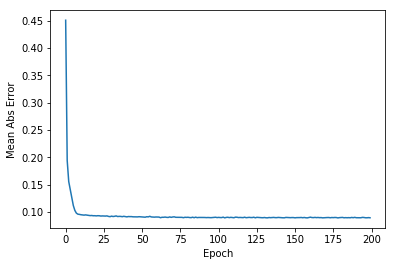

In [162]:
import matplotlib.pyplot as plt
hist=history.history
hist['epoch'] = history.epoch
#hist['mean_absolute_error']=history.mean_absolute_error
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(hist['epoch'], hist['mean_absolute_error'],label='Train Error')

### AUTOENCODER

In [72]:
#reprocessing the data for AE
feature1=['RSSI', 'SQ','ETX','Distance']
maxi=X_train[feature1].max(axis=0) 

#Scaling of train dataset
X_train[feature1]=X_train[feature1]/maxi

mini=X_train[feature1].min(axis=0)

#NScaling of test dataset
X_test[feature1]=X_test[feature1]/maxi
mini

RSSI       -0.799458
SQ         -6.816540
ETX        -0.010123
Distance   -0.400445
dtype: float64

In [57]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

#size of the encoder
encoding_dim=4

#input shape
input_img=Input(shape=(10,))

#encoded
encoded=Dense(encoding_dim,activation='relu',kernel_initializer='normal')(input_img)

#decoded
decoded=Dense(10,activation='relu',kernel_initializer='normal')(encoded)

# this model maps an input to its reconstruction
autoencoder=Model(input_img, decoded)


# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)


# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=10,
                shuffle=True)

Epoch 1/100
1758/1758 [==============================] - 0s 245us/step - loss: 0.4879
Epoch 2/100
1758/1758 [==============================] - 0s 60us/step - loss: 0.4248
Epoch 3/100
1758/1758 [==============================] - 0s 57us/step - loss: 0.3936
Epoch 4/100
1758/1758 [==============================] - 0s 64us/step - loss: 0.3753
Epoch 5/100
1758/1758 [==============================] - 0s 71us/step - loss: 0.3617
Epoch 6/100
1758/1758 [==============================] - 0s 62us/step - loss: 0.3486
Epoch 7/100
1758/1758 [==============================] - 0s 71us/step - loss: 0.3369
Epoch 8/100
1758/1758 [==============================] - 0s 69us/step - loss: 0.3271
Epoch 9/100
1758/1758 [==============================] - 0s 68us/step - loss: 0.3187
Epoch 10/100
1758/1758 [==============================] - 0s 69us/step - loss: 0.3117
Epoch 11/100
1758/1758 [==============================] - 0s 61us/step - loss: 0.3056
Epoch 12/100
1758/1758 [==============================] - 0s 6

1758/1758 [==============================] - 0s 70us/step - loss: 0.2626
Epoch 97/100
1758/1758 [==============================] - 0s 66us/step - loss: 0.2626
Epoch 98/100
1758/1758 [==============================] - 0s 69us/step - loss: 0.2626
Epoch 99/100
1758/1758 [==============================] - 0s 59us/step - loss: 0.2626
Epoch 100/100
1758/1758 [==============================] - 0s 76us/step - loss: 0.2626


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

#size of the encoder
encoding_dim=4

#input shape
input_img=Input(shape=(10,))

#encoded
encoded=Dense(8,activation='relu',kernel_initializer='normal')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)

#decoded
decoded = Dense(encoding_dim, activation='relu')(encoded)
decoded=Dense(10,activation='relu',kernel_initializer='normal')(decoded)

# this model maps an input to its reconstruction
autoencoder=Model(input_img, decoded)


# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)


# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=10,
                shuffle=True)

In [58]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)
print(decoded_imgs)

[[0.         0.12455511 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.10271834 0.        ]
 [0.         0.6025282  0.         ... 0.         1.0179375  0.0018743 ]
 ...
 [0.         0.7049637  0.         ... 0.         0.         0.        ]
 [0.         0.68212533 0.         ... 0.         1.0212705  0.00572175]
 [0.         0.6733233  0.         ... 0.         0.9910491  0.        ]]


In [ ]:
model_json=autoencoder.to_json()
with open('autoencoder5000.json','w') as json_file:
    json_file.write(model_json)
autoencoder.save_weights('autoencoder5000.h5')
print('autoencoder saved successfully')

In [ ]:
from keras.models import model_from_json
json_file=open('autoencoder1.json','r')
automodel_json=json_file.read()
automodel=model_from_json(automodel_json)
automodel.compile(optimizer='adam', loss='mse')


In [ ]:
encoded_imgs.shape

In [ ]:
decoded_imgs.shape

In [60]:
decoded_imgs[3]

array([0.        , 0.68739533, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [20]:
X_test

,RSSI,SQ,ETX,Distance,Area_ParkLOS,Area_ParkNLOS,Area_RESIDENTIAL_IN,Area_RESIDENTIAL_OD,Area_TrackLOS,Area_TrackNLOS
1663,-0.532552,0.107608,-0.282099,1.778417,0,0,0,1,0,0
1699,-0.856909,-2.346020,-0.282099,2.135698,0,0,0,1,0,0
960,-0.208194,0.598333,-0.282099,0.015075,0,0,0,0,1,0
1434,0.505393,0.680121,-0.282099,-0.494283,0,0,0,1,0,0
1634,-0.402809,0.189396,0.404499,1.490608,0,0,0,1,0,0
232,-0.402809,0.271183,0.404499,0.145353,1,0,0,0,0,0
2029,0.440521,0.680121,-0.282099,-1.129448,0,0,1,0,0,0
1568,-0.208194,0.434758,0.404499,0.835594,0,0,0,1,0,0
1757,-1.051524,-1.691719,0.404499,2.711316,0,0,0,1,0,0
766,-1.181267,-1.200994,0.404499,1.281242,0,1,0,0,0,0


In [ ]:

a=2 && 3
print (a)